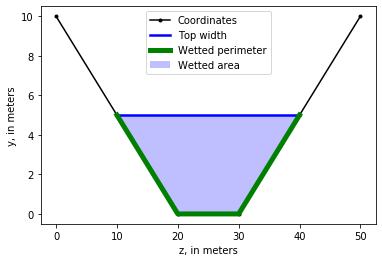

In [1]:
%matplotlib inline
import sys
import numpy as np

from pantherapy import CrossSection
from pantherapy.plot import CrossSectionPlot

boundary_elevation = 5
discharge = 30

xs_y = np.array([10, 0, 0, 10])
xs_z = np.array([0, 20, 30, 50])
roughness = np.array([0.013])

xs = CrossSection(xs_y, xs_z, roughness)
xs_plot = CrossSectionPlot(xs)
_ = xs_plot.plot(boundary_elevation)

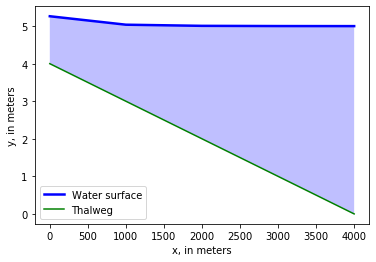

In [2]:
import matplotlib.pyplot as plt
from pantherapy import Reach, StandardStep
from pantherapy.panthera import StandardStepOptions
from pantherapy.plot import SStepResultsPlot


# initialize the reach
n_nodes = 5
slope = 0.001
dx = 1000

x = np.linspace(0, (n_nodes-1)*dx, n_nodes)
y = (n_nodes - np.arange(n_nodes) - 1) * dx * slope

xs_table = {0: xs}
xs_number = np.zeros_like(x, dtype=np.int32)

reach = Reach(x, y, xs_number, xs_table)

# initialize the solver
sstep = StandardStep(reach)

# set the options for the solution
q_table = {n_nodes - 1: discharge}
options = StandardStepOptions(q_table, boundary_elevation, False)

# solve
res = sstep.solve(options)

# plot the solution
res_plot = SStepResultsPlot(res)
_ = res_plot.plot()